## Machine Learning

### Supervised learning algorithms:

Presense of training data with predictors (features) and correct answer (labels).
Model uses training data to learn the relationship between features and labels.

#### Regression: 

Predict a Continuous number 

    Simple Linear Regression
    Multiple Linear Regression
    Polynomial Regression
    SVR
    Decision Tree Regression
    Random Forest
    
    
#### Classification: 

Predict a category. 

    Logistic Regression
    K-Nearest Neighbors (KNN)
    Support Vector Machine (SVM)
    Naive Bayes
    Decision Tree Classification
    Random Forest Classification


### Un-supervised learning algorithms:

Absense of output data. 
Machine tries to group unsorted information based on patterns without any prior training of data.

#### Clustering: 

    Grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups.

#### Anomaly detection:

    Identification of items, events or observations which do not conform to an expected pattern or other items in a dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


### Data Preprocessing

Handling Missing Data

    pandas dropna, fillna

Data Cleaning, formatting

Encoding categorical data

    pandas get_dummies
    sklearn LabelEncoder, OneHotEncoder

Splitting the data into Train and Test
    
    sklearn train_test_split

Feature Scaling:
    
    Standardization: (x - mean(x)) / std(x) sklearn StandardScaler
    Normalization: (x - min(x)) / (max(x) - min(x)) sklearn MinMaxScaler

## Classification

### Logistic Regression

Logistic Regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. These probabilities can be converted into class predictions

The regression coefficient is the estimated increase in the log odds of the outcome per unit increase in the value of the condition.

> $$F(z) = \frac{1}{1 + e^{-z}}$$

It returns a probability score between 0 and 1. 
Map this to a discrete class by selecting a threshold value.

eg: Student passed or failed in a test

    p >= 0.6, class=1
    p < 0.6, class=0


#### Sigmoid Function

Fitting logistic regression curve to the data

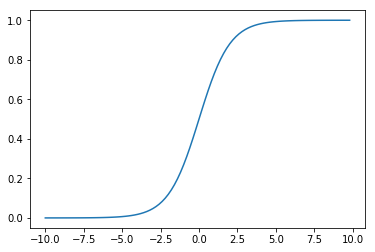

In [2]:
x = np.arange(-10., 10., 0.2)
y = 1. / (1. + np.exp(-x))
plt.plot(x,y)
plt.show()

## Cost Function in Logistic Regression

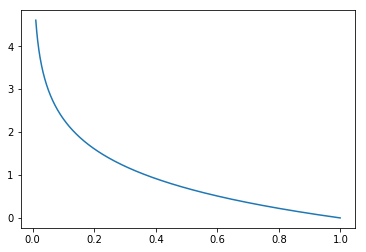

In [3]:
x = np.arange(0.01, 1., 0.001)
y = -np.log(x)
plt.plot(x,y)
plt.show()

### Applying classification algorithms on mushrooms dataset ( Boolean classification)

In [4]:
df = pd.read_csv('mushrooms.csv')
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.isnull().any()
#df['cap-color'].value_counts()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [6]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

#### Encode categorical features/label

In [7]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
X = df.iloc[:, 1:23].values
y = df.iloc[:, 0].values

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Fitting logistic regression to training set
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(0.95261538461538464, array([[820,  32],
        [ 45, 728]], dtype=int64))

### Impact of Feature Scaling

In [9]:
df = pd.read_csv('mushrooms.csv')

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])
    
X = df.iloc[:, 1:23].values
y = df.iloc[:, 0].values

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting logistic regression to training set
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(0.95569230769230773, array([[820,  32],
        [ 40, 733]], dtype=int64))

## Using Logistic regression for multi class classification

<img src="https://image.slidesharecdn.com/linearmodelsandmulticlassclassification2-170312171304/95/linear-models-and-multiclass-classification-22-638.jpg?cb=148933888">

In [10]:
#iris = pd.read_csv('iris.csv')
iris=pd.read_csv('iris.csv').drop(['Unnamed: 0'],axis=1)

iris['Species'] = iris['Species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}) # is setosa or not
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#Fitting logistic regression to training set

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.96666666666666667

In [13]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

<img src="https://docs.wso2.com/download/attachments/56989889/Multi_Class_Classification.png?version=1&modificationDate=1473828402000&api=v2" alt="logisticRegressionCost" style="width: 100;"/>

### Naive Bayes Classifier

http://scikit-learn.org/stable/modules/naive_bayes.html

Naive Bayes algorithm is a simple yet effective algorithm for most use cases. This is a probabilistic model implementing Bayes' Theorem, which is shown as something like this: 

> $$P(A | B) = \frac {P(A)P(B | A)} {P(B)}$$


This is an excellent formula for classification problems. Practically the implementation is something like this:
> $$ P(Class_k | x_1......x_n) = P(Class_k) \prod_{i=1}^n p(x_i | Class_k) $$
> $$ y_h = argmax[ P(Class_k) \prod_{i=1}^n p(x_i | Class_k) ] $$

Naive Bayes Example:
    
<br>

So, let's say we have data on 1000 pieces of fruit. The fruit being a Banana, Orange or some Other fruit and imagine we know 3 features of each fruit, whether it’s long or not, sweet or not and yellow or not, as displayed in the table below:

<br>

<img src="nb_new2.png" alt="NB" style="width: 600;"/>



So from the table what do we already know?

- 50% of the fruits are bananas

- 30% are oranges

- 20% are other fruits

<br>
Based on our training set we can also say the following:

- From 500 bananas 400 (0.8) are Long, 350 (0.7) are Sweet and 450 (0.9) are Yellow
- Out of 300 oranges 0 are Long, 150 (0.5) are Sweet and 300 (1) are Yellow
- From the remaining 200 fruits, 100 (0.5) are Long, 150 (0.75) are Sweet and 50 (0.25) are Yellow
Which should provide enough evidence to predict the class of another fruit as it’s introduced.

Which should provide enough evidence to predict the class of another fruit as it’s introduced.

So let’s say we’re given the features of a piece of fruit and we need to predict the class. 

<br>If we’re told that the additional fruit is Long, Sweet and Yellow, we can classify it using the following formula and subbing in the values for each outcome, whether it’s a Banana, an Orange or Other Fruit. The one with the highest probability (score) being the winner.

<img src="nb_new3.png" alt="NB" style="width: 600;"/>

##### Conclusion -

In this case, based on the higher score 0.01875 < 0.252 we can assume this Long, Sweet and Yellow fruit is, in fact, a Banana.

##### pros: 

    Naive assumption of independence between every pair of features
    Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods
    
##### con:

    Can not learn relationship between features



#### Types of Naive Bayes

Gaussian NB: It assumes that the features follow a normal distribution.

MultiNomial NB: It is suitable for discrete features. Eg: word counts for text classification

Bernoulli NB: For discreet features, like MuliNomianNB. MultinomialNB works with occurrence counts,
    BernoulliNB is designed for binary/boolean features
    
Note: Multinomial distributions can not contain negative values

In [14]:

df = pd.read_csv('mushrooms.csv')

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])
    
X = df.iloc[:, 1:23].values
y = df.iloc[:, 0].values

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(0.91569230769230769, array([[773,  79],
        [ 58, 715]], dtype=int64))

In [15]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(0.82769230769230773, array([[787,  65],
        [215, 558]], dtype=int64))

### Support Vector Machines

http://scikit-learn.org/stable/modules/svm.html#classification

SVM is one if the most versitile algorithms out there and can be used for a wide varity of application. This algorithm a inherently binary classifier which split a feature vectors into two parts. Suppose we have a feature vectors(compressed into a 2-D space) for Dogs and Cats and are plotted using a scatter plot. 

This seperation is done by pushing the hyperline as furthur away from the data clusters furthest vectors called "support vectors".

This hyperplane can be defined by this simple equation: 
>  $$y = w * x + b$$

Where the goal is the find the best value of 'w' which seperates the clusters the best way. 'w' can be correctly estimated by a loss function.

Visualization of the SVM: 

<img src="SVM.png" alt="knn_graph" style="width: 200;"/>

    Finds hyperplanes separating labels
    Support vectors are the data points nearest to the hyperplane
    Get the margin for each hyperplane
    Select the optimal hyperplane (one with the highest margin)


In [16]:
#Fitting SVM to training set
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)  

y_pred = svm.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(1.0, array([[852,   0],
        [  0, 773]], dtype=int64))

### Decision Tree

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Decision Tree is a type of supervised learning model which tries to split the data into homogeneous sets to make predictions, visually this resembles a tree, shown below.

Typical Decision Tree Representation:

<br>
<img src="https://www.digitalvidya.com/wp-content/uploads/2018/05/DicisionTree-1024x391.png" alt="knn_graph" style="width: 600;"/>


pros:

    Simple to understand and interpret.
    Works better than Logistic regression in case of non-linear relationship between dependent & independent variables
    
con:

    Tends to overfit on data with a large number of features

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(1.0, array([[852,   0],
        [  0, 773]], dtype=int64))

### K-Nearest Neighbors

KNN is a algorithm which can be used both for regression and classification problems. KNN is a lazy learning algorithm which means it does not retain any information of what it has learned from the training data but rather keeps the data handy to make predictions.

The algorithm works this way:
1. Store all the feature vectors with there mapping that is the class they were assigned to, let's say 
> $$ X_i -> Y_i $$
2. Take a unknown feature vector which has to be classified say 'u'.
3. Calculate the distance of all the k neighbors where k is user defined which is nothing but a parameter which defined how many neighbors in the dataset around 'u' is to be considered. 
4. The k neighbors are calculated using *Euclidean Distance* which is something like this 
> #### $$ distance = \sqrt{\sum_{i=0}^{n}(x_j - x_i )^ 2} $$ 
5. Once the k neighbors are found find there class and based on population of the k neighbors class assign the most common class to the 'u'.


<img src="https://qph.fs.quoracdn.net/main-qimg-5ec1cba17b824a46e4e55295c48c3379" alt="knn_graph" style="width: 300px;"/>



In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.99692307692307691

### Random Forest

Newer concept, first proposed in 1995.

A random forest is basically a combination of bagging with trees. You have the freedom to using any model in bagging, when you use a tree-based model then it’s called a random forest.

Random forest is an ensemble model built with a collection of decision tree classifiers. Each decision tree classifier works on random subset of data with random number of features. 

Multiple decision trees from training data and output the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Random decision forests correct the decision trees' habit of overfitting to their training set

Visualization of the Random Forest Classifier: 

<img src="RandomF.png" alt="knn_graph" style="width: 200;"/>

<br>

<img src="RandomF2.png" alt="knn_graph" style="width: 200;"/>


<img src="RandomF3.png" alt="knn_graph" style="width: 200;"/>

### Advantages and Disadvantages of Random Forest
- It reduces overfitting in decision trees and helps to improve the accuracy

- It is flexible to both classification and regression problems

- It works well with both categorical and continuous values

- It automates missing values present in the data

- Normalising of data is not required as it uses a rule-based approach.

<br>
However, despite these advantages, a random forest algorithm also has some drawbacks.

- It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 

- It also requires much time for training as it combines a lot of decision trees to determine the class.

- Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0